In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


In [2]:
# 2.Load Dataset
data = pd.read_csv("hanoi_quality.csv")
data

,date,pm25,pm10,o3,no2,so2,co
0,3/1/2019,76,1,15,36,7,7
1,3/2/2019,117,64,4,28,3,5
2,3/3/2019,10,64,1,22,16,5
3,3/4/2019,118,56,13,22,14,6
4,3/5/2019,2,34,15,21,6,6
...,...,...,...,...,...,...,...
1915,5/28/2024,85,56,14,1,8,6
1916,5/29/2024,58,50,13,1,8,6
1917,5/30/2024,47,39,10,1,8,8
1918,5/31/2024,48,63,10,1,8,8


In [3]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1920 non-null   object
 1   pm25    1920 non-null   int64 
 2   pm10    1920 non-null   int64 
 3   o3      1920 non-null   int64 
 4   no2     1920 non-null   int64 
 5   so2     1920 non-null   int64 
 6   co      1920 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 105.1+ KB


,pm25,pm10,o3,no2,so2,co
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,63.091667,39.147917,16.548958,19.444271,11.690104,7.580208
std,40.260213,21.942295,16.580522,10.014321,6.428450,2.986652
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,32.000000,22.000000,8.000000,13.000000,7.000000,5.000000
50%,54.500000,36.000000,14.000000,19.000000,11.000000,7.000000
75%,88.000000,54.000000,21.000000,27.000000,17.000000,9.000000
max,217.000000,121.000000,441.000000,53.000000,43.000000,21.000000


In [4]:
#Chọn thuộc tính
data = data[['pm25']]
data = data.dropna() 
data = data.reset_index(drop=True) 
data

,pm25
0,76
1,117
2,10
3,118
4,2
...,...
1915,85
1916,58
1917,47
1918,48


In [5]:
def smoothed(data):
    # Apply moving average filter to smooth the forecasted values
    window_size = 5  # You can adjust the window size as needed
    forecast_smoothed = data.rolling(window=window_size).mean()

    # Interpolate NaN values resulting from the moving average
    forecast_smoothed_interpolated = forecast_smoothed.interpolate()

    # Fill remaining NaN values
    forecast_smoothed_filled = forecast_smoothed_interpolated.fillna(method='bfill')  # or 'ffill', or use fillna(value=0)
    
    return forecast_smoothed_filled

# Example usage
data = smoothed(data)


<Axes: >

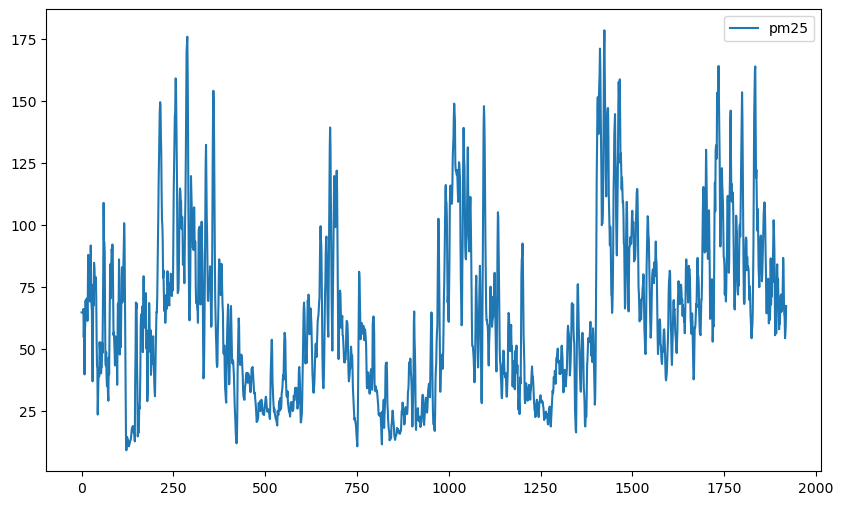

In [6]:
data.plot(figsize=(10,6))

In [7]:
# 2. Đọc file dữ liệu và chia train test theo tỉ lệ 7:3
train_size = int(0.8 * len(data))
test_size = int(0.2 * len(data))

# Chia dữ liệu thành các tập
train_data = data[:train_size]
test_data = data[train_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))


Train data size: 1536
Test data size: 384


In [8]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['pm25'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10430.555, Time=2.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10905.184, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10435.179, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10491.518, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10903.186, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10428.696, Time=1.60 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10436.587, Time=0.77 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10426.777, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10299.609, Time=1.86 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10426.872, Time=0.75 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10430.501, Time=1.37 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=10428.139, Time=0.72 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10294.905, Time=2.92 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.43 sec
 ARIMA(3,1,3)(0,0,0)[0] i

ARIMA(order=(5, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [9]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(n_periods=len(y_test))


In [10]:
y_pred = pd.DataFrame(y_pred, columns=['pm25'])
y_pred = smoothed(y_pred)
y_pred = y_pred.to_numpy()

In [11]:
# 4. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index + 1, stop=last_index+91, step=1)

# Tạo mảng 90 ngày 
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Dự đoán 90 ngày tiếp theo
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# # In ra dự đoán giá trong 90 ngày tiếp theo
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[45.53910897 48.43717961 54.41778455 56.53726457 55.95168614 55.51756132
 55.20966798 53.59877845 52.35768834 52.61652019 53.60377437 53.94605102
 54.03952614 54.22181188 54.28613848 53.92930308 53.63812317 53.630689
 53.75783574 53.77624205 53.81915494 53.89985498 53.94112697 53.87470143
 53.8223287  53.81395791 53.82393964 53.81310448 53.8228888  53.8439551
 53.8567624  53.84570687 53.83914163 53.83741128 53.83687717 53.83153615
 53.83328069 53.83749879 53.84049526 53.83869702 53.8385742  53.83843409
 53.83805638 53.83642053 53.83673105 53.83738175 53.83795989 53.83762424
 53.83788205 53.83790867 53.83783842 53.83742668 53.83750369 53.83756252
 53.83765834 53.83757686 53.83768729 53.83769738 53.83769665 53.83760343
 53.83763033 53.83762271 53.83763763 53.83761382 53.83764761 53.83764732
 53.83765219 53.83763196 53.83764197 53.83763566 53.83763856 53.83763128
 53.83764049 53.83763891 53.83764138 53.83763687 53.83764037 53.83763791
 53.837

In [12]:
# 5. Tính RMSE
test_rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print('Testing RMSE:', test_rmse)

# 6. Tính MAPE
test_mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
print('\nTesting MAPE:', test_mape)

# 7. Tính MAE
test_mae = np.mean(np.abs(y_test - y_pred))
print("\nMAE:", test_mae)

Testing RMSE: 36.781805460136454

Testing MAPE: 30.364261995361204

MAE: 28.350592997721275


In [13]:
test_data.index

RangeIndex(start=1536, stop=1920, step=1)

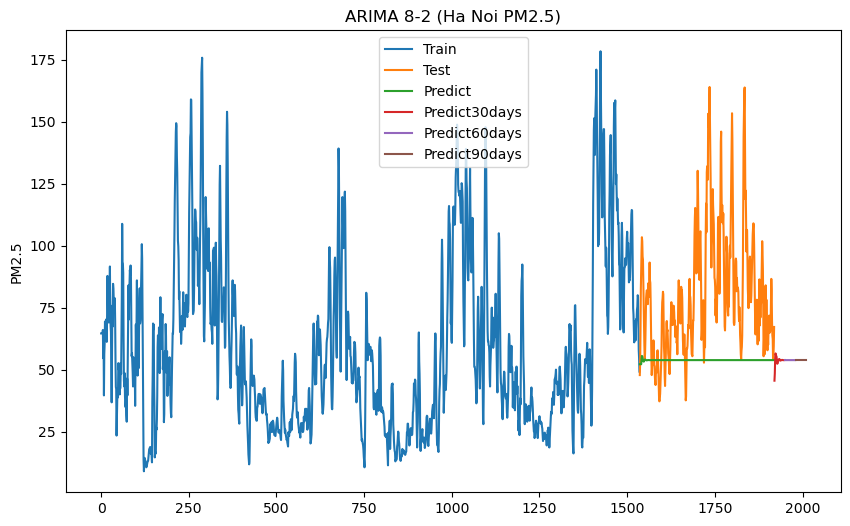

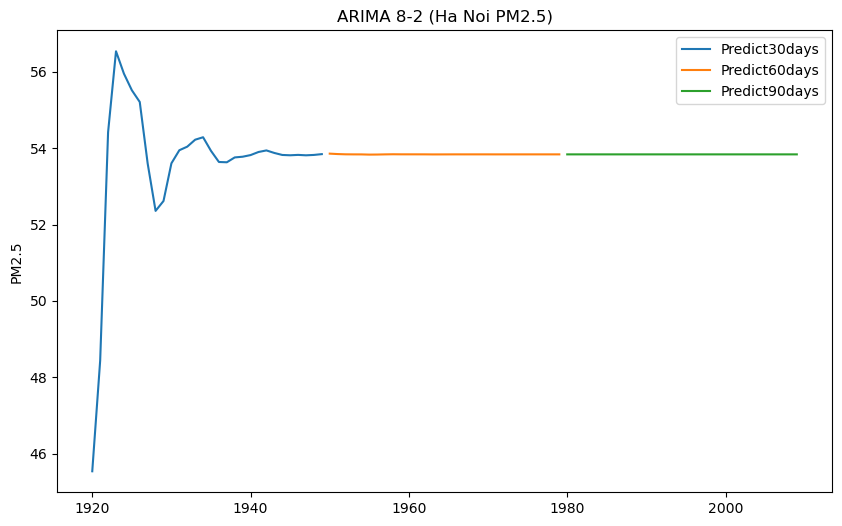

In [14]:
# 9.Vẽ hình
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)


last_data = pd.RangeIndex(start=last_index+1, stop=last_index+31, step=1)
plt.plot(last_data,y_next_90_days[0:30])

last_data = pd.RangeIndex(start=last_index+31, stop=last_index+61, step=1)
plt.plot(last_data,y_next_90_days[30:60])

last_data = pd.RangeIndex(start=last_index+61, stop=last_index+91, step=1)
plt.plot(last_data,y_next_90_days[60:90])
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title('ARIMA 8-2 (Ha Noi PM2.5)')
plt.ylabel('PM2.5')
plt.show()


#DỰ đians 90 ngày
plt.figure(figsize=(10, 6))
last_data = pd.RangeIndex(start=last_index+1, stop=last_index+31, step=1)
plt.plot(last_data,y_next_90_days[0:30])

last_data = pd.RangeIndex(start=last_index+31, stop=last_index+61, step=1)
plt.plot(last_data,y_next_90_days[30:60])

last_data = pd.RangeIndex(start=last_index+61, stop=last_index+91, step=1)
plt.plot(last_data,y_next_90_days[60:90])
plt.legend(['Predict30days', 'Predict60days', 'Predict90days'])
plt.title('ARIMA 8-2 (Ha Noi PM2.5)')
plt.ylabel('PM2.5')
plt.show()

